# Import

In [1]:
# this library is used for drawing the charts easily.
# use this library to draw your charts in this homework.
!pip install -q git+https://github.com/MJAHMADEE/docs

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
from keras import backend as K
from keras.layers import Dense
from keras.models import Model

# 1.Prepare data

In [3]:
# unzip data and load them
!gdown 1upPWoWIE5P8fZLc0R5Hfq-DLtxnAb0EW
!unzip time-series.zip

Downloading...
From: https://drive.google.com/uc?id=1upPWoWIE5P8fZLc0R5Hfq-DLtxnAb0EW
To: /content/time-series.zip
100% 7.45M/7.45M [00:00<00:00, 45.5MB/s]
Archive:  time-series.zip
  inflating: 4.csv                   
  inflating: 5.csv                   
  inflating: 6.csv                   
  inflating: 7.csv                   
  inflating: 8.csv                   
  inflating: 9.csv                   
  inflating: 10.csv                  
  inflating: 11.csv                  
  inflating: 12.csv                  
  inflating: 13.csv                  
  inflating: 14.csv                  
  inflating: 15.csv                  
  inflating: 16.csv                  
  inflating: 17.csv                  
  inflating: 18.csv                  
  inflating: 19.csv                  
  inflating: 20.csv                  
  inflating: 21.csv                  
  inflating: 22.csv                  
  inflating: 23.csv                  
  inflating: 24.csv                  
  inflating: 25.csv 

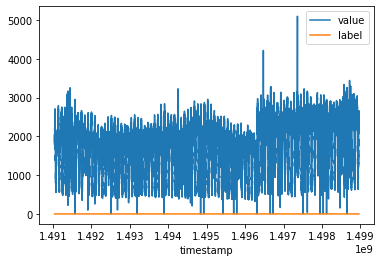

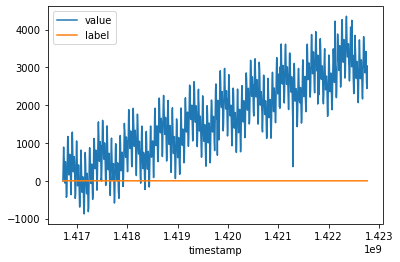

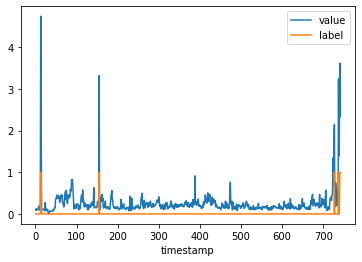

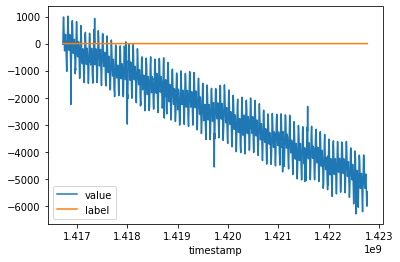

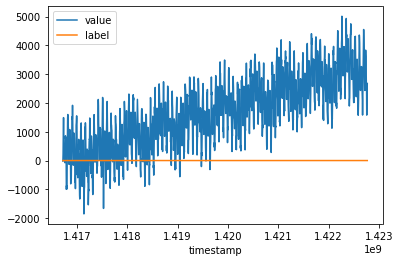

In [4]:
# show chart of 5 dataset(csv file) randomly

datasets = sorted(glob.glob('*.csv'))

dfs = [pd.read_csv(d) for d in datasets]

for i, df in enumerate(dfs):
    df.index = df['timestamp']
    df = df[['value', 'label']]
    dfs[i] = df

for i in range(5):
    d = shuffle(dfs)[0]
    d.plot()

In [ ]:
# split data to train and test

def split_train_test(df):
    x = df['value'].values
    y = df['label'].values
    x = x.reshape((-1, 1, 1))
    return train_test_split(x, y, test_size=0.2, shuffle=False)

dataset = []
for df in dfs:
    dataset.append(split_train_test(df))

# Metric functions

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + 
    K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# 3. Create and train 3 RNN model(Simple, LSTM, GRU)

Here I splited every dataset to train and test and fit the model with them and since we have multiple datasets with different ranges, the results aren't good

In [ ]:
# Simple
model = keras.Sequential()
model.add(layers.SimpleRNN(64, input_shape=(1, 1)))
model.add((Dense(1, activation='sigmoid')))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=(f1_score_m,)
)

for i, (x_train, x_test, y_train, y_test) in enumerate(dataset, start=1):
    print(f'dataset number {i}')
    model.fit(
        x_train, y_train,
        epochs=10,
        batch_size=64,
        validation_data=(x_test, y_test)
    )

dataset number 1
Epoch 1/10
1608/1608 [==============================] - 8s 5ms/step - loss: 0.3079 - f1_score_m: 7.9496e-04 - val_loss: 0.1941 - val_f1_score_m: 0.0015
Epoch 2/10
1608/1608 [==============================] - 7s 4ms/step - loss: 0.2961 - f1_score_m: 0.0014 - val_loss: 0.1926 - val_f1_score_m: 0.0050
Epoch 3/10
1608/1608 [==============================] - 7s 4ms/step - loss: 0.2944 - f1_score_m: 0.0026 - val_loss: 0.1911 - val_f1_score_m: 0.0154
Epoch 4/10
1608/1608 [==============================] - 7s 4ms/step - loss: 0.2930 - f1_score_m: 0.0041 - val_loss: 0.1740 - val_f1_score_m: 0.0143
Epoch 5/10
1608/1608 [==============================] - 7s 4ms/step - loss: 0.2912 - f1_score_m: 0.0066 - val_loss: 0.1805 - val_f1_score_m: 0.0210
Epoch 6/10
1608/1608 [==============================] - 7s 4ms/step - loss: 0.2900 - f1_score_m: 0.0111 - val_loss: 0.1653 - val_f1_score_m: 0.0215
Epoch 7/10
1608/1608 [==============================] - 7s 4ms/step - loss: 0.2889 - f1_sco

In [ ]:
# LSTM
model = keras.Sequential()
model.add(layers.LSTM(64, input_shape=(1, 1)))
model.add((Dense(1, activation='sigmoid')))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=(f1_score_m,)
)

for i, (x_train, x_test, y_train, y_test) in enumerate(dataset, start=1):
    print(f'dataset number {i}')
    model.fit(
        x_train, y_train,
        epochs=10,
        batch_size=64,
        validation_data=(x_test, y_test)
    )

dataset number 1
Epoch 1/10
1608/1608 [==============================] - 9s 5ms/step - loss: 0.3200 - f1_score_m: 1.6584e-04 - val_loss: 0.1991 - val_f1_score_m: 7.6540e-05
Epoch 2/10
1608/1608 [==============================] - 8s 5ms/step - loss: 0.2953 - f1_score_m: 0.0018 - val_loss: 0.1852 - val_f1_score_m: 0.0118
Epoch 3/10
1608/1608 [==============================] - 7s 4ms/step - loss: 0.2924 - f1_score_m: 0.0060 - val_loss: 0.1736 - val_f1_score_m: 0.0202
Epoch 4/10
1608/1608 [==============================] - 7s 4ms/step - loss: 0.2893 - f1_score_m: 0.0150 - val_loss: 0.1788 - val_f1_score_m: 0.0264
Epoch 5/10
1608/1608 [==============================] - 7s 4ms/step - loss: 0.2869 - f1_score_m: 0.0321 - val_loss: 0.1690 - val_f1_score_m: 0.0292
Epoch 6/10
1608/1608 [==============================] - 7s 4ms/step - loss: 0.2857 - f1_score_m: 0.0521 - val_loss: 0.1648 - val_f1_score_m: 0.0306
Epoch 7/10
1608/1608 [==============================] - 7s 5ms/step - loss: 0.2847 - f1

In [ ]:
# GRU
model = keras.Sequential()
model.add(layers.GRU(64, input_shape=(1, 1)))
model.add((Dense(1, activation='sigmoid')))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=(f1_score_m,)
)

for i, (x_train, x_test, y_train, y_test) in enumerate(dataset, start=1):
    print(f'dataset number {i}')
    model.fit(
        x_train, y_train,
        epochs=10,
        batch_size=64,
        validation_data=(x_test, y_test)
    )

dataset number 1
Epoch 1/10
1608/1608 [==============================] - 9s 5ms/step - loss: 0.3068 - f1_score_m: 1.3820e-04 - val_loss: 0.1885 - val_f1_score_m: 0.0048
Epoch 2/10
1608/1608 [==============================] - 7s 4ms/step - loss: 0.2949 - f1_score_m: 0.0030 - val_loss: 0.1899 - val_f1_score_m: 0.0179
Epoch 3/10
1608/1608 [==============================] - 7s 4ms/step - loss: 0.2917 - f1_score_m: 0.0087 - val_loss: 0.1692 - val_f1_score_m: 0.0228
Epoch 4/10
1608/1608 [==============================] - 7s 4ms/step - loss: 0.2883 - f1_score_m: 0.0244 - val_loss: 0.1647 - val_f1_score_m: 0.0268
Epoch 5/10
1608/1608 [==============================] - 7s 5ms/step - loss: 0.2860 - f1_score_m: 0.0442 - val_loss: 0.1624 - val_f1_score_m: 0.0295
Epoch 6/10
1608/1608 [==============================] - 7s 4ms/step - loss: 0.2851 - f1_score_m: 0.0633 - val_loss: 0.1610 - val_f1_score_m: 0.0294
Epoch 7/10
1608/1608 [==============================] - 7s 4ms/step - loss: 0.2844 - f1_sco

# 4. Preprocces data to get better performance

I used min max scaler on each dataset because if we use them on all of them combined, the result wouldn't be appropriate and this way each dataset maps to [0:1] and the anomalies are easier to detect but we have datasets with different patterns and the model can't perform well.(I only trained the LSTM model to save time.)

In [ ]:
# Preprocces method 1

for i, (x_train, x_test, y_train, y_test) in enumerate(dataset):
    scaler = MinMaxScaler()
    scaler.fit(x_train.reshape((-1, 1)))
    x_train_new = scaler.transform(x_train.reshape((-1, 1))).reshape((-1, 1, 1))
    x_test_new = scaler.transform(x_test.reshape((-1, 1))).reshape((-1, 1, 1))
    dataset[i] = (x_train_new, x_test_new, y_train, y_test)

In [ ]:
# Preprocces method 2

In [ ]:
# Train 3 models again
model = keras.Sequential()
model.add(layers.LSTM(64, input_shape=(1, 1)))
model.add((Dense(1, activation='sigmoid')))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=(f1_score_m,)
)

for i, (x_train, x_test, y_train, y_test) in enumerate(dataset, start=1):
    print(f'dataset number {i}')
    model.fit(
        x_train, y_train,
        epochs=5,
        batch_size=64,
        validation_data=(x_test, y_test)
    )

dataset number 1
Epoch 1/5
1608/1608 [==============================] - 15s 5ms/step - loss: 0.3265 - f1_score_m: 2.2704e-04 - val_loss: 0.2181 - val_f1_score_m: 0.0000e+00
Epoch 2/5
1608/1608 [==============================] - 8s 5ms/step - loss: 0.2997 - f1_score_m: 0.0000e+00 - val_loss: 0.2043 - val_f1_score_m: 0.0000e+00
Epoch 3/5
1608/1608 [==============================] - 7s 5ms/step - loss: 0.2991 - f1_score_m: 0.0000e+00 - val_loss: 0.2012 - val_f1_score_m: 0.0000e+00
Epoch 4/5
1608/1608 [==============================] - 8s 5ms/step - loss: 0.2990 - f1_score_m: 0.0000e+00 - val_loss: 0.2032 - val_f1_score_m: 0.0000e+00
Epoch 5/5
1608/1608 [==============================] - 7s 4ms/step - loss: 0.2986 - f1_score_m: 2.0730e-04 - val_loss: 0.1972 - val_f1_score_m: 5.5346e-04
dataset number 2
Epoch 1/5
1615/1615 [==============================] - 8s 5ms/step - loss: 0.2675 - f1_score_m: 0.0010 - val_loss: 0.0826 - val_f1_score_m: 0.0000e+00
Epoch 2/5
1615/1615 [==================

# 6. Train a self supervise model

The self-supervised task that I used is to predict the model next value based on previous value.

In [ ]:
def create_steps(data, step=1):
    # This function gets a data and returns y as x[i + steps]
    x, y = [], []
    for i in range(0, len(data) - step):
        x.append([data[i + j] for j in range(step)])
        y.append(data[i + step])
    return np.array(x).reshape((-1, 1)), np.array(y)

In [ ]:
# compile and train the model
model = keras.Sequential()
model.add(layers.LSTM(128, input_shape=(1, 1), return_sequences=True))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.LSTM(32))
model.add(layers.Dense(1))

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=(f1_score_m,)
)

for i, (x_train, x_test, y_train, y_test) in enumerate(dataset, start=1):
    print(f'dataset number {i}')
    x_train, y_train = create_steps(x_train.flatten())
    x_test, y_test = create_steps(x_test.flatten())
    
    model.fit(
        x_train, y_train,
        epochs=10,
        batch_size=64,
        validation_data=(x_test, y_test)
    )

dataset number 1
Epoch 1/10
1607/1607 [==============================] - 14s 7ms/step - loss: 0.0014 - f1_score_m: 0.0000e+00 - val_loss: 0.0013 - val_f1_score_m: 5.6724e-04
Epoch 2/10
1607/1607 [==============================] - 9s 6ms/step - loss: 7.5260e-04 - f1_score_m: 6.2228e-04 - val_loss: 0.0013 - val_f1_score_m: 0.0010
Epoch 3/10
1607/1607 [==============================] - 9s 6ms/step - loss: 7.5244e-04 - f1_score_m: 6.2228e-04 - val_loss: 0.0013 - val_f1_score_m: 5.9479e-04
Epoch 4/10
1607/1607 [==============================] - 10s 6ms/step - loss: 7.5013e-04 - f1_score_m: 0.0000e+00 - val_loss: 0.0013 - val_f1_score_m: 4.8414e-04
Epoch 5/10
1607/1607 [==============================] - 9s 6ms/step - loss: 7.4551e-04 - f1_score_m: 0.0000e+00 - val_loss: 0.0013 - val_f1_score_m: 4.0675e-04
Epoch 6/10
1607/1607 [==============================] - 9s 6ms/step - loss: 7.4855e-04 - f1_score_m: 0.0000e+00 - val_loss: 0.0014 - val_f1_score_m: 1.2438e-04
Epoch 7/10
1607/1607 [=======

In [ ]:
model.save('pre-trained.h5')

In [ ]:
# delete last layer of model

new_model = keras.Model(inputs=model.input, outputs=model.layers[-2].output)
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5_input (InputLayer)   [(None, 1, 1)]            0         
                                                                 
 lstm_5 (LSTM)               (None, 1, 128)            66560     
                                                                 
 lstm_6 (LSTM)               (None, 1, 64)             49408     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
Total params: 128,384
Trainable params: 128,384
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# freeze all remaining layers except the last one
for layer in new_model.layers[:-1]:
    layer.trainable = False
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5_input (InputLayer)   [(None, 1, 1)]            0         
                                                                 
 lstm_5 (LSTM)               (None, 1, 128)            66560     
                                                                 
 lstm_6 (LSTM)               (None, 1, 64)             49408     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
Total params: 128,384
Trainable params: 12,416
Non-trainable params: 115,968
_________________________________________________________________


In [ ]:
# add 2 dence layer to the model

dense1 = layers.Dense(4)(new_model.output)
dense2 = layers.Dense(1, activation='sigmoid')(dense1)

final_model = keras.Model(inputs=new_model.input, outputs=dense2)

final_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5_input (InputLayer)   [(None, 1, 1)]            0         
                                                                 
 lstm_5 (LSTM)               (None, 1, 128)            66560     
                                                                 
 lstm_6 (LSTM)               (None, 1, 64)             49408     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 128,521
Trainable params: 12,553
Non-trainabl

In [ ]:
# train the main task(anomaly detection)

final_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=(f1_score_m,)
)

for i, (x_train, x_test, y_train, y_test) in enumerate(dataset, start=1):
    print(f'dataset number {i}')
    final_model.fit(
        x_train, y_train,
        epochs=10,
        batch_size=64,
        validation_data=(x_test, y_test)
    )

dataset number 1
Epoch 1/10
1608/1608 [==============================] - 14s 7ms/step - loss: 0.3077 - f1_score_m: 0.0311 - val_loss: 0.1583 - val_f1_score_m: 0.0340
Epoch 2/10
1608/1608 [==============================] - 10s 6ms/step - loss: 0.2776 - f1_score_m: 0.1139 - val_loss: 0.1474 - val_f1_score_m: 0.0356
Epoch 3/10
1608/1608 [==============================] - 10s 6ms/step - loss: 0.2716 - f1_score_m: 0.1389 - val_loss: 0.1599 - val_f1_score_m: 0.0378
Epoch 4/10
1608/1608 [==============================] - 9s 6ms/step - loss: 0.2701 - f1_score_m: 0.1463 - val_loss: 0.1681 - val_f1_score_m: 0.0381
Epoch 5/10
1608/1608 [==============================] - 9s 6ms/step - loss: 0.2699 - f1_score_m: 0.1476 - val_loss: 0.1588 - val_f1_score_m: 0.0375
Epoch 6/10
1608/1608 [==============================] - 9s 6ms/step - loss: 0.2698 - f1_score_m: 0.1450 - val_loss: 0.1501 - val_f1_score_m: 0.0373
Epoch 7/10
1608/1608 [==============================] - 9s 6ms/step - loss: 0.2696 - f1_scor

# 7. Handle unbalanced data problem

We can use upsampling on minority class so that we have the same amount of data on both classes and I did it on one of datasets which the results turned out to be good.

In [ ]:
from sklearn.utils import resample

df = dfs[0]

df_majority = df[(df['label']==0)] 
df_minority = df[(df['label']==1)]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,
                                 n_samples= df_majority.shape[0],
                                 random_state=42)

df_upsampled = pd.concat([df_minority_upsampled, df_majority])

x_train, x_test, y_train, y_test = split_train_test(df_upsampled)

In [ ]:
model = keras.Sequential()
model.add(layers.LSTM(64, input_shape=(1, 1)))
model.add((Dense(1, activation='sigmoid')))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=(f1_score_m,)
)

model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test)
)

Epoch 1/10
2951/2951 [==============================] - 26s 8ms/step - loss: 0.6377 - f1_score_m: 0.7670 - val_loss: 0.8804 - val_f1_score_m: 0.0000e+00
Epoch 2/10
2951/2951 [==============================] - 25s 9ms/step - loss: 0.6172 - f1_score_m: 0.7536 - val_loss: 0.9747 - val_f1_score_m: 0.0000e+00
Epoch 3/10
2951/2951 [==============================] - 20s 7ms/step - loss: 0.6133 - f1_score_m: 0.7446 - val_loss: 0.8811 - val_f1_score_m: 0.0000e+00
Epoch 4/10
2951/2951 [==============================] - 27s 9ms/step - loss: 0.6100 - f1_score_m: 0.7464 - val_loss: 0.8404 - val_f1_score_m: 0.0000e+00
Epoch 5/10
2951/2951 [==============================] - 22s 7ms/step - loss: 0.6053 - f1_score_m: 0.7530 - val_loss: 0.7967 - val_f1_score_m: 0.0000e+00
Epoch 6/10
2951/2951 [==============================] - 25s 8ms/step - loss: 0.5987 - f1_score_m: 0.7572 - val_loss: 0.8648 - val_f1_score_m: 0.0000e+00
Epoch 7/10
2951/2951 [==============================] - 19s 6ms/step - loss: 0.591

# 8. Statistical method for anomaly detection

In [28]:
# Z score
import scipy.stats as stats

df = dfs[1]
df['z-score'] = stats.zscore(df['value'])

df

,value,label,z-score
timestamp,,,
1493568000,2.25,0,-0.245363
1493568060,3.15,0,-0.137465
1493568120,3.05,0,-0.149454
1493568180,3.00,0,-0.155448
1493568240,2.30,0,-0.239368
...,...,...,...
1501475400,5.70,0,0.168244
1501475460,4.55,0,0.030375
1501475520,5.45,0,0.138272


In [29]:
# iqr

print(stats.iqr(df['value']))

2.1500000960000003
